<a href="https://colab.research.google.com/github/Ayush0345/Causal-Inference-Experiments/blob/main/PSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q2. (a) Descriptive Statistics of the Sample

In [13]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from itertools import combinations
import plotnine as p
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from causallib.datasets import load_nhefs
from causallib.estimation import IPW
from causallib.evaluation import evaluate

data = '/content/catholic.csv'
catholic = pd.read_csv(data)

summary = catholic.describe()
print(summary)

                 i       math12     catholic        math8       female  \
count  5671.000000  5671.000000  5671.000000  5671.000000  5671.000000   
mean   2836.000000    51.051238     0.104391    51.489515     0.520014   
std    1637.221019     9.502415     0.305794     9.683425     0.499643   
min       1.000000    29.879999     0.000000    34.480000     0.000000   
25%    1418.500000    43.535000     0.000000    43.450001     0.000000   
50%    2836.000000    51.330002     0.000000    50.450001     1.000000   
75%    4253.500000    58.610001     0.000000    58.555000     1.000000   
max    5671.000000    71.370003     1.000000    77.199997     1.000000   

              race      parmar8      faminc8      fathed8      mothed8  \
count  5671.000000  5671.000000  5671.000000  5671.000000  5671.000000   
mean      3.532887     5.344384     9.526186     3.606948     3.380356   
std       0.953747     1.576191     2.217688     2.267043     2.141246   
min       1.000000     1.000000     1

(b) Estimating the OLS model:

In [2]:
model = sm.OLS.from_formula('math12 ~ catholic', data=catholic).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 math12   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     90.48
Date:                Fri, 23 Feb 2024   Prob (F-statistic):           2.69e-21
Time:                        20:17:57   Log-Likelihood:                -20770.
No. Observations:                5671   AIC:                         4.154e+04
Df Residuals:                    5669   BIC:                         4.156e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.6447      0.132    382.815      0.0

Estimate of β = 3.8949

The estimate is biased because of K dimensions in the vector of covariates X, leading to the curse of dimensionality. Moreover, it makes measuring the Euclidean distance to match the covariates harder as well. As the distance between matched covariates moves away from 0, it creates a strong bias in the estimates. Therefore, we need to correct the endogeneity problem generated by the model through propensity score matching.

(c) Set of observables related to 'Catholic school attendance' are 'Female school attendance, Race, Parents' marriage, Family income, Parents' education'.

(d) Estimating propensity score using a logit model

First, measuring the Euclidean distance to make sure that the distance between the covariates is appropriate for matching.

Them estimating the logit model to generate the propensity score.

In [3]:
mean1 = catholic[catholic.catholic == 1].catholic.mean()
mean0 = catholic[catholic.catholic == 0].catholic.mean()

ate = np.unique(mean1-mean0)[0]
print("The experimental ATE estimate is {:.2f}".format(ate))

The experimental ATE estimate is 1.00


In [ ]:
!pip install PsmPy

from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *
sns.set(rc={'figure.figsize':(10,8)}, font_scale = 1.3)



In [34]:
psm = PsmPy(catholic, treatment='catholic', indx='i', exclude = [])
psm.logistic_ps(balance = True)
psm.predicted_data


,i,math12,math8,female,race,parmar8,faminc8,fathed8,mothed8,fhowfar,mhowfar,fight8,nohw8,disrupt8,riskdrop8,propensity_score,propensity_logit,catholic
0,1,49.770000,50.270000,0,4,6,10,2,2,4,4,0,0,0,1,0.419676,-0.324102,1
1,2,59.840000,51.520000,0,4,6,10,8,8,4,5,0,0,0,0,0.642724,0.587206,1
2,3,50.380001,47.560001,1,4,6,10,1,7,4,4,0,0,0,0,0.601992,0.413773,1
3,4,45.029999,46.599998,1,4,6,10,8,8,5,5,0,0,0,1,0.469040,-0.123999,1
4,5,54.259998,60.220001,1,4,6,11,2,2,5,5,0,0,0,1,0.467696,-0.129397,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5666,5593,62.450001,66.139999,0,5,6,11,5,5,5,5,0,0,0,0,0.228220,-1.218392,0
5667,5594,35.180000,37.849998,1,4,6,3,1,1,2,2,0,0,0,2,0.155949,-1.688683,0
5668,5595,38.619999,45.130001,1,4,6,12,8,2,5,5,0,0,0,0,0.543375,0.173938,0
5669,5596,54.980000,60.290001,0,5,6,11,8,6,5,5,1,0,1,0,0.298450,-0.854691,0


(e) Using the propensity score as the vector of covariates to get the causal inference of catholic school attendance on 12th grade math scores. (ii). Nearest neighbor matching using propensity score matching.

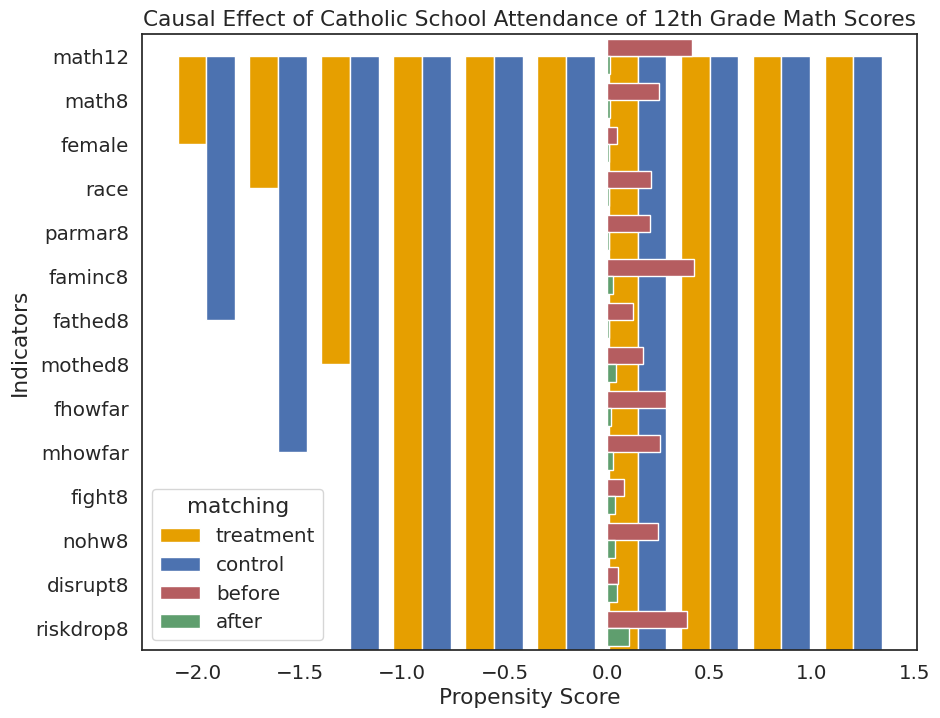

In [ ]:
psm.knn_matched_12n(matcher='propensity_score', how_many=3)
psm.plot_match(Title='Matched treatment', Ylabel='Indicators', Xlabel= 'Propensity Score', colors=['#E69F00', 'b'] ,save=True)
psm.effect_size_plot(title='Causal Effect of Catholic School Attendance of 12th Grade Math Scores', before_color='r', after_color='g', save=True)


(i) Inverse Propensity Weighting

<Axes: xlabel='Absolute Standard Mean Difference', ylabel='Covariates'>

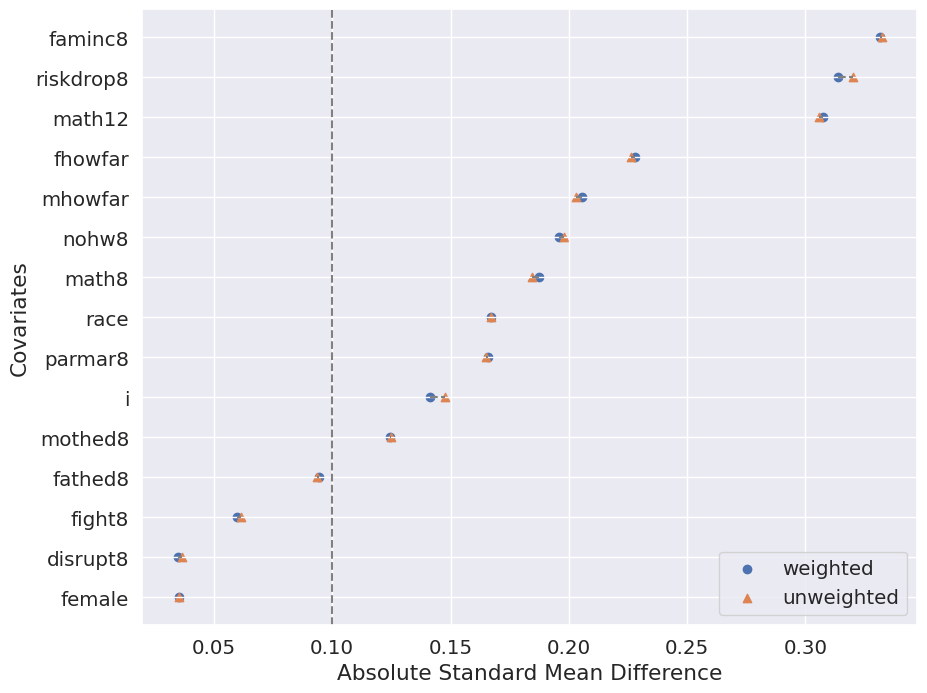

In [25]:
ipw = IPW(LogisticRegression(solver='liblinear'))
results = evaluate(ipw, catholic, catholic['catholic'], catholic['math12'], cv="auto")
fig, ax = plt.subplots()
results.plot_covariate_balance(kind="love", ax=ax, thresh=0.1)

The Love plot calculates the standardized mean difference between groups for each covariate before and after weighting. Therefore, after weighting the difference for all covariates will be smaller than some threshold, usually 0.1. This result indicates that the weighting successfully created a pseudo population where the covariates are equally distributed between the two groups. (Zohar, 2022. Hands on Inverse-Propensity-Weighting in Python using causallib. Towards Data Science.)